In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier , KNeighborsRegressor
from sklearn.datasets import make_classification , make_regression

KNN Classification

In [19]:
X , y = make_classification(n_samples=1000  ,n_classes=3, n_informative=8 , random_state=1 ,n_features=10)

In [20]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=2)

In [21]:
knnclf = KNeighborsClassifier(n_neighbors=5)
knnclf.fit(X_train , y_train)   # There is no training in KNN , it is just storing the value of X and y

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [22]:
# At the time of prediction it will calculate distance with all X_train of X_test , then 
# Nearest K neighbour will give the class and then majority voting will be the y_pred of X_test
y_pred = knnclf.predict(X_test)



In [23]:
from sklearn.metrics import accuracy_score
print("Accuracy:" , accuracy_score(y_test , y_pred))

Accuracy: 0.85


In [24]:
# For best value of K we can apply grid search cv or just a loop for some values of k
score = []
for k in range(1 ,16):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train , y_train)
    score.append(accuracy_score(y_test ,clf.predict(X_test)))

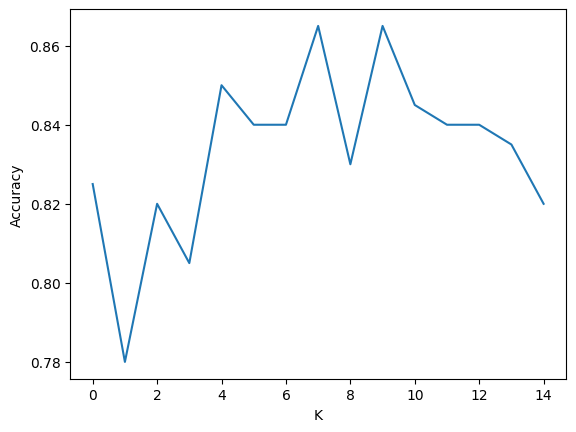

In [25]:
import matplotlib.pyplot as plt 
plt.plot(score)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()

In [32]:
# From graph value of K should be 7 or 9 for best accuracy

# For Large Datasets we should not apply KNN 
# For class imbalance datasets we should not use KNN 
# If K value is not choosen wisely then it may be sensitive to Outlier
# K = 1 means overfitting , K = large means underfitting
# K should be odd  

In [30]:
clf = KNeighborsClassifier(n_neighbors=9)
clf.fit(X_train , y_train)

,n_neighbors,9
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [31]:
y_pred2 = clf.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy:" , accuracy_score(y_test , y_pred2))

Accuracy: 0.83


KNN Regressor

In [33]:
X , y = make_regression(n_samples=1000 , n_features=10 , n_informative=7 , n_targets=1 , random_state=2)

In [34]:
X_train , X_test , y_train , y_test = train_test_split(X , y, test_size=0.2 , random_state=2)

In [35]:
knnr = KNeighborsRegressor(n_neighbors=5)
knnr.fit(X_train , y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [36]:
from sklearn.metrics import r2_score
y_pred = knnr.predict(X_test)
print("R2 score" , r2_score(y_test , y_pred))

R2 score 0.788333106319671


In [37]:
# For best value of K we can apply grid search cv or just a loop for some values of k
score = []
for k in range(1 ,16):
    clf = KNeighborsRegressor(n_neighbors=k)
    clf.fit(X_train , y_train)
    score.append(r2_score(y_test ,clf.predict(X_test)))

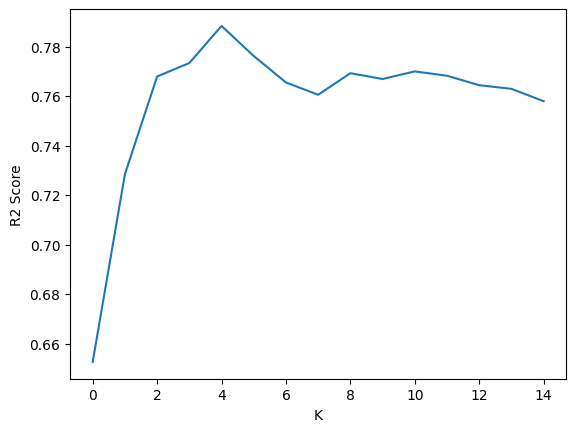

In [38]:
import matplotlib.pyplot as plt 
plt.plot(score)
plt.xlabel("K")
plt.ylabel("R2 Score")
plt.show()